https://www.wikiwand.com/en/Finite_difference_method#/Implicit_method

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#financial parameters

S = 50 #underlying value
K = 50 #strike
r = 0.05 # interest rate without risk
sigma = 0.2 # volatility
T = 3 # maturity

In [3]:
# Numerical parameters
M = 80 # nb of points in asset mesh
N = 200 #nb of points in time mesh
Szero = 0 # min val
Smax = 150 # max val

In [13]:
sol_mesh = np.zeros((N + 1, M + 1))

# Step
dS = Smax / M
dt = T / N

# Mesh
Smesh = np.arange(0, Smax + 1, dS)
Tmesh = np.arange(T, -1e-10, -dt)

#payoff, put
sol_mesh[0,:] = np.array([np.maximum(K - S_mesh[t], 0) for t in range(S_mesh.shape[0])])

#limit condition for S = 0
sol_mesh[:,0] = K * np.exp(-r*(T- T_mesh)) 
# limit condition for S=M
sol_mesh[:,M] = 0 


i = np.arange(1, M + 1)

A = 0.5 * dt * (r*i-sigma**2 * i**2)
B = 1 + (sigma**2 * i**2 + r) * dt
C = -0.5 * dt *(sigma**2 * i**2 + r*i)

In [14]:
from scipy.sparse import diags

Acoeffs = np.zeros((M + 1))
Bcoeffs = np.zeros((M + 1))
Ccoeffs = np.zeros((M + 1))

for i in range(M + 1):
    Acoeffs[i] = A[i-1]
    Bcoeffs[i] = B[i-1]
    Ccoeffs[i] = C[i-1]
    
Tri = diags([Acoeffs[1:], Bcoeffs, Ccoeffs[:-1]], [-1, 0, 1], shape=(M + 1, M + 1), dtype=float).toarray()

Tri_inv =  np.linalg.inv(Tri)

In [38]:
for j in range(N):
    temp = np.zeros((M + 1))
    temp[0] = A[0] * sol_mesh[j + 1, 0]
    temp[-1] = C[M - 1] * sol_mesh[j + 1, M]
    print(temp.shape)
    RHS = sol_mesh[j, :].T - temp
    temp = Tri_inv * RHS
    print(temp.shape)
    sol_mesh[j + 1, 1:-2] = temp[1:-2]

(81,)
(81, 81)


ValueError: could not broadcast input array from shape (78,81) into shape (78)

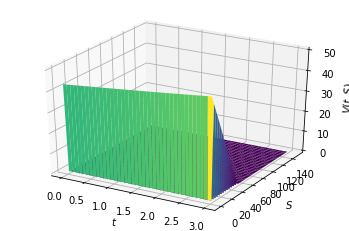

In [36]:
[Smat, tmat] = np.meshgrid(Smesh, Tmesh)

fig = plt.figure()
ax = fig.gca(projection='3d')

#axis labels
ax.set_xlabel('$t$')
ax.set_ylabel('$S$')
ax.set_zlabel('$V(t,S)$')
surf = ax.plot_surface(tmat, Smat, np.reshape(sol_mesh, (Smat.shape)), cmap=cm.viridis,
                   antialiased=True)
plt.show()

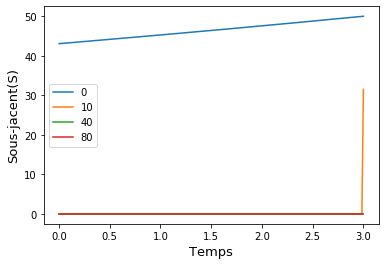

In [28]:
plt.plot(Tmesh, sol_mesh[:, 0], label='0')
plt.plot(Tmesh, sol_mesh[:, 10], label='10')
plt.plot(Tmesh, sol_mesh[:, 40], label='40')
plt.plot(Tmesh, sol_mesh[:, 80], label='80')
plt.legend()
plt.xlabel('Temps', fontsize=13)
plt.ylabel('Sous-jacent(S)', fontsize=13)
plt.show()